## MODÜLLERİN İMPORT EDİLMESİ

In [1]:
from TSCMaterialModels import Mander
from TSCConfimentBarsRules import ConfimentDesign as cd
from TSCResponseSpectra import SeismicInputs,SeismicTSC,SeismicResistanceBuildingInputs

## KULLANILACAK DEĞERLER

In [2]:
"""Units N,mm"""
Nd                      = 16000 
B                       = 400
H                       = 400
s                       = 80
TieRebarDiameter        = 8
LongnitRebarDiameter    = 14
ClearCoverConc          = 25
NumBarsTop              = 2
NumBarsInterior         = 1
NumBarsBot              = 2
X_tiebars               = 2
Y_tiebars               = 3
fsy                     = 220
fywe                    = 220
eps_su                  = 0.08
f_co                    = 25
f_ce                    = 25
Fctd                    = 10
Ln                      = 2600

## TBDY2018 DİKDÖRTGEN KOLON SARGI DONATISI TASARIMI

In [3]:
ConfinmentDesign = cd(Nd, fsy, Fctd, Ln, B, H, ClearCoverConc, X_tiebars, Y_tiebars, f_co, fywe, TieRebarDiameter, LongnitRebarDiameter)
ConfinmentDesign

ConfimentDesign(Nd=16000, Fsy=220, Fctd=10, Ln=2600, Width=400, Height=400, Cover=25, Xkol=2, Ykol=3, Fck=25, Fywk=220, ConfimentRebarDiameter=8, LongnitudeRebarDiameter=14)

In [4]:
ConfinmentDesign.Set_Variables()

Kolon Serbest Bölgesindeki Etriye Adeti - Etriye Çapi / SarılmaDışıAralık / OrtaSarılmadakiAralık / UçSarılmaAralık = 42 - ∅8 / 16 / 5 / 5


In [6]:
s = ConfinmentDesign.s_OptEndConfArea
s

52

## TBDY2018 MALZEME MODELLERİ (EK-5A)

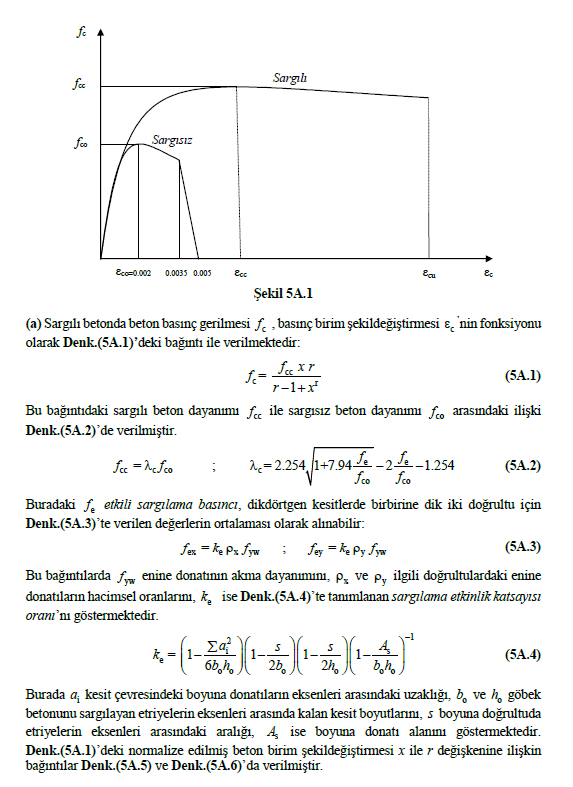    

In [ ]:
mander = Mander(B                    = B,
                H                    = H,
                s                    = s,
                TieRebarDiameter     = TieRebarDiameter,
                LongnitRebarDiameter = LongnitRebarDiameter,
                ClearCoverConc       = ClearCoverConc,
                NumBarsTop           = NumBarsTop,
                NumBarsInterior      = NumBarsInterior,
                NumBarsBot           = NumBarsBot,
                X_tiebars            = X_tiebars,
                Y_tiebars            = Y_tiebars,
                fsy                  = fsy,
                f_ywe                = fywe,
                eps_su               = eps_su,
                f_co                 = f_co,
                f_ce                 = f_ce
                )

mander.Plot_Manders()

## TBDY2018 HEDEF SPEKTRUMLARIN ELDE EDİLMESİ

In [ ]:
SeismicVariables = SeismicInputs(lat = 39.85,lon = 30.2,soil = "ZC",intensity = "DD2")
StructureVariables = SeismicResistanceBuildingInputs(Hn = 70, R = 8.0, D = 3.0, I = 1.0)
rs = SeismicTSC(SeismicVariables = SeismicVariables,BuildingVariables = StructureVariables)

In [ ]:
rs.plot_HorizontalElasticSpectrum()

In [ ]:
rs.ElasticSpectrums.head(10)

In [ ]:
SeismicVariables

In [ ]:
StructureVariables

In [ ]:
Sae_Tp = rs.Get_Sae_Tp(T=1.2)
Sae_Tp

In [ ]:
Sar_Tp = rs.Get_SaR_Tp(T=1.2)
Sar_Tp